# Kollokasjoner for nøkkelord

In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle

In [2]:
css()

In [3]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += "<span style='font-size:150%'>{stuff}</span>".format(stuff= ', '.join(categories['propr']))
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [4]:
import pandas as pd

In [5]:
import ast

In [6]:
#colls_before = pd.read_json('demokrati_before.json')

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [9]:
cliques = lambda G: [list(x) for  x in list(gnl.make_cliques_from_graph(G.to_undirected())[1].values())]
    

## Definer nøkkelordet

noteboken blir kjørt flere ganger, en notebook for hvert nøkkelord, *influensa*, *helse*

In [10]:
reference = pd.read_json('avis_agg_sample_20.json')

In [11]:
keyword = 'vaksine'

In [12]:
filename = 'collocation_' + keyword + ".csv"

## Grafstruktur topos

In [13]:
keyword_graph = nb.make_graph(keyword, cutoff=16)

In [14]:
comm = gnl.community_dict(keyword_graph)

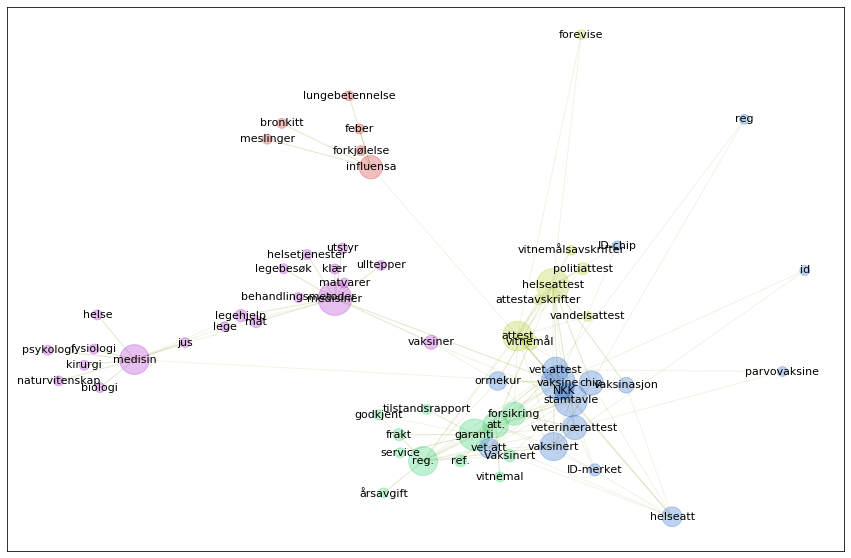

In [15]:
gnl.show_graph(keyword_graph, spread=0.8, fontsize=11)

In [16]:
keyword_cliques = cliques(keyword_graph)

# Grafens klikkstruktur (klikk = clique)

Klikkstrukturen er fin for å se overlapp og forskjellige kontekster hvor nøkkelordet forekommer. 

In [73]:
for i in keyword_cliques:
    mu.printmd("<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(i)))

<span style='font-size:1.1em'>NKK, vet.att, attestavskrifter, helseatt, stamtavle, att., chip, godkjent, Vaksinert, reg., forevise, vaksinasjon, vaksinert, garanti, ID-merket, forsikring, vitnemål, politiattest, ref., helseattest, ID-chip, ormekur, attest, vandelsattest, veterinærattest, vitnemålsavskrifter, frakt, vaksine, vet.attest</span>

<span style='font-size:1.1em'>vet.att, helseatt, stamtavle, chip, att., reg., vaksinasjon, vaksinert, garanti, forsikring, helseattest, ormekur, attest, veterinærattest, vaksine, vet.attest</span>

<span style='font-size:1.1em'>helseattest, attest, stamtavle, chip, reg., vaksinert, vaksine</span>

# Topoi fra grafen

Der klikkstrukturen kombinerer færre element, er alle nodene i grafen med og definerer et topos.

In [18]:
pos=""
for x in comm:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n"
mu.printmd(pos)

### helseattest-attest
<span style='font-size:1.1em'>helseattest, attest, vitnemål, politiattest, attestavskrifter, vandelsattest, forevise, vitnemålsavskrifter</span>
### garanti-reg.
<span style='font-size:1.1em'>garanti, reg., att., forsikring, Vaksinert, frakt, ref., service, årsavgift, godkjent, vitnemal, tilstandsrapport</span>
### vaksine-stamtavle
<span style='font-size:1.1em'>vaksine, stamtavle, vaksinert, vet.attest, veterinærattest, chip, vet.att, helseatt, ormekur, NKK, vaksinasjon, ID-merket, id, ID-chip, reg, parvovaksine</span>
### medisiner-medisin
<span style='font-size:1.1em'>medisiner, medisin, vaksiner, mat, legehjelp, ulltepper, behandlingsmetoder, utstyr, naturvitenskap, fysiologi, matvarer, helse, klær, psykologi, helsetjenester, kirurgi, biologi, legebesøk, jus, lege</span>
### influensa-bronkitt
<span style='font-size:1.1em'>influensa, bronkitt, lungebetennelse, meslinger, forkjølelse, feber</span>


# Assosiasjoner fra kollokasjonene

<span style="font-size:150%">nb.collocation(keyword, yearfrom=1950, yearto=2000, before=10, after=10, corpus='avis')</span>


Her ser vi først på referansekorpuset, og validerer det. Det er gruppert på tiår.

In [19]:
barchart = lambda word, df: df.loc[word].plot(kind='bar', rot=30, figsize=(10,5),title=word);

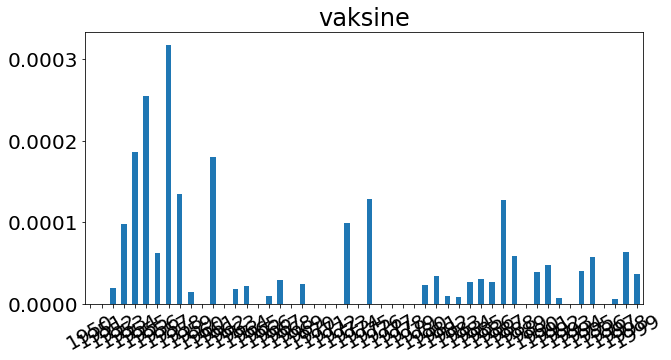

In [20]:
barchart(keyword, reference);

In [21]:
from time import time

collocations = dict()
step = 1

for i in range(1950, 2000):
    print(i)
    t0 = time()
    try:
        collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
    except:
        try:
            collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
        except:
            print("gir opp", i)
    print((time() - t0)/60, "minutter")

1950
0.019106419881184895 minutter
1951
0.016841137409210206 minutter
1952
0.015530169010162354 minutter
1953
0.02061871290206909 minutter
1954
0.04587726195653279 minutter
1955
0.030923191706339517 minutter
1956
0.03415273427963257 minutter
1957
0.02495827277501424 minutter
1958
0.03256945610046387 minutter
1959
0.016895985603332518 minutter
1960
0.017126254240671792 minutter
1961
0.029628833134969074 minutter
1962
0.027117077509562174 minutter
1963
0.019166529178619385 minutter
1964
0.025458673636118572 minutter
1965
0.03303803205490112 minutter
1966
0.013151617844899495 minutter
1967
0.012859070301055908 minutter
1968
0.01422213315963745 minutter
1969
0.019887344042460123 minutter
1970
0.0181480606396993 minutter
1971
0.015902984142303466 minutter
1972
0.02243847449620565 minutter
1973
0.014138086636861166 minutter
1974
0.01827644109725952 minutter
1975
0.0456764817237854 minutter
1976
0.024786166350046792 minutter
1977
0.016961264610290527 minutter
1978
0.01175315777460734 minutter

In [22]:
colls = nb.frame(collocations)

In [23]:
colls = pd.concat([nb.frame(collocations[i], i) for i in collocations], axis=1).fillna(0)

In [24]:
def group_frames(df, bins=10, mode='rel'):
    agg = pd.DataFrame()
    step = 10
    for i in range(0, len(df.columns), step):
        agg[df.columns[i]] = df[df.columns[i:i+step]].sum(axis=1)
    return agg

In [25]:
agg = group_frames(colls)

In [26]:
agg.to_csv('agg_' + filename)

In [27]:
nb.normalize_corpus_dataframe(agg)

True

In [28]:
ref = group_frames(reference)
nb.normalize_corpus_dataframe(ref)

True


# Opptelling

# Sammenligner med en referanse


In [29]:
ref.sort_values(by=ref.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.0663397,0.0632207,0.0621348,0.0647454,0.067428
",",0.0403233,0.0416929,0.0356677,0.0371536,0.0367841
i,0.0247726,0.0250452,0.0241426,0.0222206,0.0206715
og,0.0210996,0.0213896,0.0187403,0.0186412,0.0163648
til,0.0116118,0.0113418,0.0108464,0.0103711,0.00896154
er,0.0115398,0.010944,0.0107374,0.0107173,0.0100185
-,0.00541194,0.00706152,0.00962028,0.0122338,0.0178025
som,0.0101848,0.0101861,0.00957867,0.00899728,0.00766517
det,0.0113158,0.0105602,0.00956937,0.00859934,0.00707421
for,0.00928578,0.00940446,0.00923043,0.00847701,0.00735523


In [30]:
agg.sort_values(by=agg.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.0469455,0.0488621,0.0501808,0.056742,0.0839385
",",0.0316938,0.0363819,0.0319801,0.0296529,0.0414133
i,0.0226626,0.0226786,0.0227939,0.0207147,0.0174387
en,0.0190956,0.0190094,0.02217,0.0251303,0.0158283
er,0.0181533,0.0192467,0.0202712,0.019598,0.0151106
mot,0.0127676,0.015401,0.019774,0.0229713,0.0166988
og,0.0151153,0.0191554,0.0189331,0.0180393,0.0214274
som,0.0186327,0.0175612,0.0187071,0.0173088,0.0148532
det,0.0150037,0.0162468,0.0171067,0.0153127,0.010776
å,0.0142184,0.0136303,0.0148825,0.0148567,0.00972859


In [78]:
pmi = pd.DataFrame()
exp = 1.1
for i in agg:
    pmi[i] = agg[i]**exp/(pd.concat([agg[i], ref[i]],axis=1).sum(axis=1))

In [79]:
nb.normalize_corpus_dataframe(pmi)

True

<br>
<br>
<br>
<br>


# De 15 beste for passende kolonne

In [76]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
mot,0.000189623,0.000223272,0.000288417,0.000205006,0.00012654
poliomyelitt,0.000179396,0.000184235,0.000192749,0.000130066,8.43896e-05
Salks,0.000178644,0.000171663,0.000180056,0.000109369,6.82014e-05
vaksine,0.000174685,0.000207072,0.000246073,0.000172217,0.000110954
effektiv,0.00017254,0.000201022,0.000247479,0.000178,0.000106
virus,0.000170721,0.000188454,0.000229967,0.000149348,9.41746e-05
dr.,0.000169405,0.000173026,0.000195815,0.000119991,6.68316e-05
fremstille,0.000167327,0.000183332,0.000221153,0.000145636,8.49309e-05
barn,0.000165873,0.000145854,0.000177129,0.000133491,8.84128e-05
vaksinert,0.000164955,0.000187453,0.000215138,0.0001501,9.32821e-05


In [77]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
mot,0.000189623,0.000223272,0.000288417,0.000205006,0.00012654
poliomyelitt,0.000179396,0.000184235,0.000192749,0.000130066,8.43896e-05
Salks,0.000178644,0.000171663,0.000180056,0.000109369,6.82014e-05
vaksine,0.000174685,0.000207072,0.000246073,0.000172217,0.000110954
effektiv,0.00017254,0.000201022,0.000247479,0.000178,0.000106
virus,0.000170721,0.000188454,0.000229967,0.000149348,9.41746e-05
dr.,0.000169405,0.000173026,0.000195815,0.000119991,6.68316e-05
fremstille,0.000167327,0.000183332,0.000221153,0.000145636,8.49309e-05
barn,0.000165873,0.000145854,0.000177129,0.000133491,8.84128e-05
vaksinert,0.000164955,0.000187453,0.000215138,0.0001501,9.32821e-05


In [35]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(70).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
mot,0.000166569,0.000200224,0.000261679,0.000184773,0.000109627
vaksine,0.000153447,0.000185696,0.000223261,0.00015522,9.61237e-05
levende,0.000144427,0.000184504,0.00018789,0.000108933,6.15419e-05
effektiv,0.000151563,0.00018027,0.000224536,0.000160433,9.18321e-05
sykdommen,0.000142013,0.000174645,0.000229158,0.000159772,8.93949e-05
meslinger,0.000112069,0.000170757,0.000184941,0.000128492,7.63589e-05
virus,0.000149965,0.000169,0.000208648,0.000134608,8.15871e-05
vaksinert,0.0001449,0.000168102,0.000195194,0.000135286,8.08139e-05
forkjølelse,0.000123953,0.000165719,0.000194461,0.000115199,6.33607e-05
poliomyelitt,0.000157585,0.000165217,0.000174881,0.000117229,7.31099e-05


In [36]:
pmi.sort_values(by=pmi.columns[2], ascending=False).head(45).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
mot,0.000166569,0.000200224,0.000261679,0.000184773,0.000109627
sykdommen,0.000142013,0.000174645,0.000229158,0.000159772,8.93949e-05
effektiv,0.000151563,0.00018027,0.000224536,0.000160433,9.18321e-05
vaksine,0.000153447,0.000185696,0.000223261,0.00015522,9.61237e-05
influensa,0.000140129,0.000158183,0.000217907,0.000135563,8.78604e-05
man,0.000139922,0.000161686,0.000213449,0.000128981,7.05399e-05
finnes,0.000112252,0.000148375,0.000211234,0.000147079,9.21568e-05
doser,0.000129383,0.000161902,0.000210203,0.000124075,7.71432e-05
virus,0.000149965,0.000169,0.000208648,0.000134608,8.15871e-05
en,0.000127945,0.000150357,0.000206123,0.000152055,8.10735e-05


In [37]:
pmi.sort_values(by=pmi.columns[3], ascending=False).head(45).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
mot,0.000166569,0.000200224,0.000261679,0.000184773,0.000109627
effektiv,0.000151563,0.00018027,0.000224536,0.000160433,9.18321e-05
hjernehinnebetennelse,0,0.000124511,0.000199806,0.000159984,9.37944e-05
sykdommen,0.000142013,0.000174645,0.000229158,0.000159772,8.93949e-05
AIDS,0,0,0,0.000159031,7.72213e-05
vaksine,0.000153447,0.000185696,0.000223261,0.00015522,9.61237e-05
smittsom,8.34031e-05,0.000141055,0.000182865,0.000152876,8.44691e-05
en,0.000127945,0.000150357,0.000206123,0.000152055,8.10735e-05
utviklet,0.000108188,0.000141174,0.000182819,0.000149257,8.32402e-05
utvikle,0.000107379,0.000128818,0.000188839,0.000148217,8.61815e-05


In [38]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(45).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
mot,0.000166569,0.000200224,0.000261679,0.000184773,0.000109627
NKK,0,0,0,0.000118599,9.95432e-05
vaksine,0.000153447,0.000185696,0.000223261,0.00015522,9.61237e-05
reg.,0,0,0,8.72857e-05,9.5901e-05
Lev,0,0,0,0.000109211,9.57253e-05
hjernehinnebetennelse,0,0.000124511,0.000199806,0.000159984,9.37944e-05
stamtavle,0,0,0,0.000113745,9.35647e-05
vet.att,0,0,0,0.000116769,9.23186e-05
finnes,0.000112252,0.000148375,0.000211234,0.000147079,9.21568e-05
effektiv,0.000151563,0.00018027,0.000224536,0.000160433,9.18321e-05


In [39]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(80).fillna(0).index

Index(['mot', 'vaksine', 'levende', 'effektiv', 'sykdommen', 'meslinger',
       'virus', 'vaksinert', 'forkjølelse', 'poliomyelitt', 'vaksinasjon',
       'fremstille', 'vaksinen', 'doser', 'drepte', 'man', 'bruk', 'polio',
       'beskyttelse', 'Sabins', 'immunitet', 'influensa', 'brukes', 'kreft',
       'tilstrekkelig', 'dr.', 'sykdommer', 'Mellbye', 'Salks',
       'vaksineringen', 'beskytte', 'framstille', 'gratis', 'leger', 'munnen',
       'landet', 'frysetørret', 'serum', 'kopper', 'en', 'Vaksinen',
       'begrenset', 'bekjempe', 'Salk', 'finnes', 'vaksinering', 'beskytter',
       'produsere', 'overlege', 'vaksinere', 'mengder', 'stivkrampe',
       'fremstilt', 'difteri', 'fremstillet', 'epidemi', 'lykkes', 'hunder',
       'tuberkulose', 'munn-', 'vaksineres', 'Levende', 'medisiner',
       'kikhoste', 'poliovaksine', 'forkjølelser', 'forskere', 'Pasteur',
       'lumske', 'lage', 'perorale', 'slik', 'injeksjon', 'framstilt',
       'overlegen', 'WHO', 'rekvirere', 'import

In [40]:
agg.loc[pmi.sort_values(by=pmi.columns[4], ascending=False).head(50).fillna(0).index].style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
mot,0.0127676,0.015401,0.019774,0.0229713,0.0166988
NKK,0,0,0,0.00020938,0.00377563
vaksine,0.00259568,0.00378484,0.0024774,0.00263354,0.00262565
reg.,0,0,0,0.000167504,0.00306393
Lev,0,0,0,0.000125628,0.00258544
hjernehinnebetennelse,0,7.30194e-05,0.000813743,0.00354551,0.00206876
stamtavle,0,0,0,0.000130281,0.00201246
vet.att,0,0,0,0.000153546,0.00176518
finnes,0.000582789,0.00104053,0.0023689,0.00251256,0.00266184
effektiv,0.00255849,0.00311549,0.00287523,0.00384329,0.00185163


In [41]:
ordliste = 'liv kropp hygiene ernæring idrett arbeidsmiljø livskvalitet risiko omsorg velvære utdanning tjenester og sosial fysisk psykisk syk sykdom sikkerhet'.split()
ord_art = pmi.loc[ordliste]

In [42]:
ordliste 

['liv',
 'kropp',
 'hygiene',
 'ernæring',
 'idrett',
 'arbeidsmiljø',
 'livskvalitet',
 'risiko',
 'omsorg',
 'velvære',
 'utdanning',
 'tjenester',
 'og',
 'sosial',
 'fysisk',
 'psykisk',
 'syk',
 'sykdom',
 'sikkerhet']

In [43]:
pmil = (agg.loc[ordliste]/ref.loc[ordliste]).apply(round)


In [44]:
pmil['translation'] = ['life',
 'body',
 'hygiene',
 'nutrition',
 'sport',
 'work environment',
 'quality of life',
 'risk',
 'caring',
 'wellness',
 'education',
 'services',
 'and',
 'social',
 'physical',
 'psychic',
 'sick',
 'disease',
 'safety']

In [45]:
pmil.fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990,translation
liv,0,1,1,1,1,life
kropp,0,13,0,1,0,body
hygiene,42,34,42,88,8,hygiene
ernæring,0,0,0,23,10,nutrition
idrett,0,2,0,0,0,sport
arbeidsmiljø,0,0,0,0,0,work environment
livskvalitet,0,0,0,0,0,quality of life
risiko,21,5,4,5,10,risk
omsorg,0,0,0,0,0,caring
velvære,0,0,0,0,0,wellness


In [46]:
agg.loc[ordliste].style.bar(axis=1)

,1950,1960,1970,1980,1990
liv,5.78656e-05,7.30194e-05,0.000198915,0.000158198,0.000126659
kropp,0,6.08495e-05,0,9.30579e-06,4.02091e-06
hygiene,0.000103331,0.000115614,0.000108499,0.00014424,1.80941e-05
ernæring,0,0,0,8.8405e-05,1.60836e-05
idrett,0,2.43398e-05,9.04159e-06,4.65289e-06,0
arbeidsmiljø,nan,nan,nan,nan,nan
livskvalitet,nan,nan,nan,nan,nan
risiko,0.000173597,3.65097e-05,3.61664e-05,4.65289e-05,9.44914e-05
omsorg,0,0,0,0,1.20627e-05
velvære,nan,nan,nan,nan,nan


In [47]:
pmi.to_csv(filename)

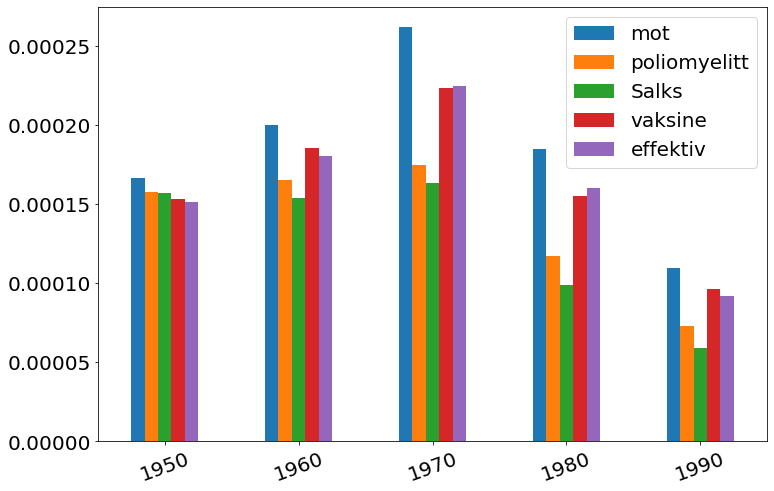

In [48]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

In [49]:
def freq_assoc_val(agg, pmi, col):
    vals = list(pmi.sort_values(by=pmi.columns[col], ascending=False).head(5).fillna(0).index)
    agg.loc[vals].sort_values(by= agg.columns[col], ascending=False).transpose().plot(kind="bar", rot=0, figsize=(12, 8))

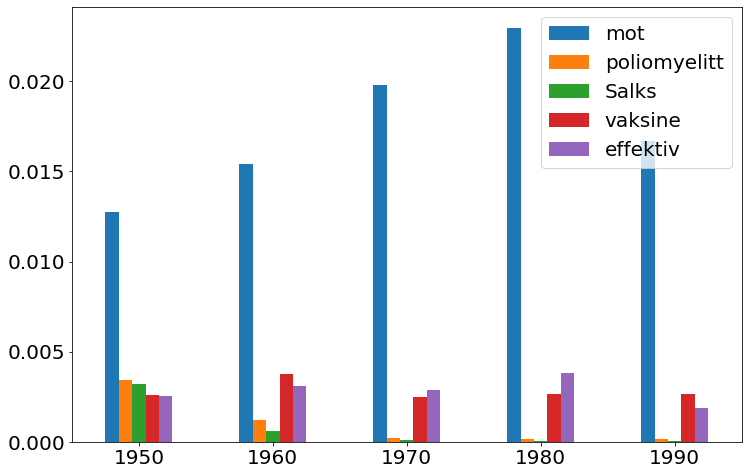

In [50]:
freq_assoc_val(agg, pmi, 0)

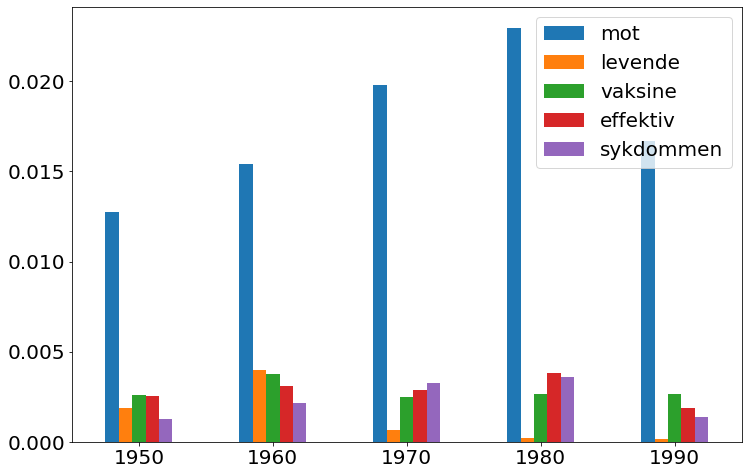

In [51]:
freq_assoc_val(agg, pmi, 1)

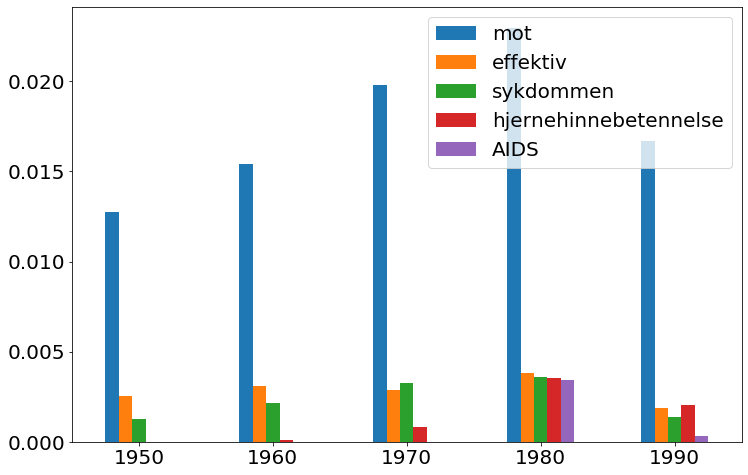

In [52]:
freq_assoc_val(agg, pmi, 3)

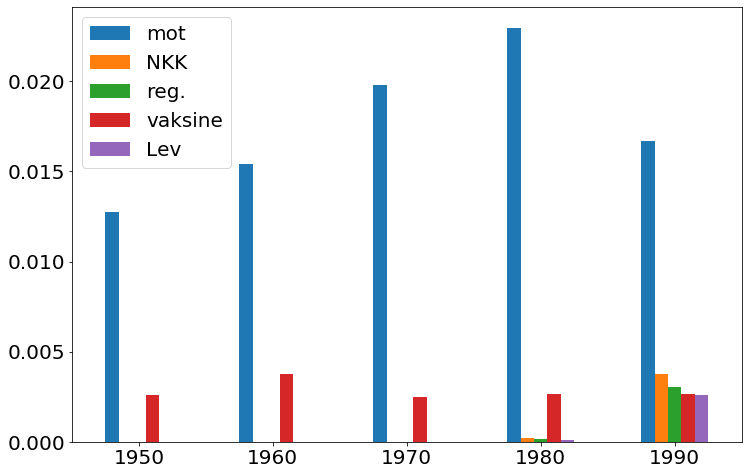

In [53]:
freq_assoc_val(agg, pmi, 4)

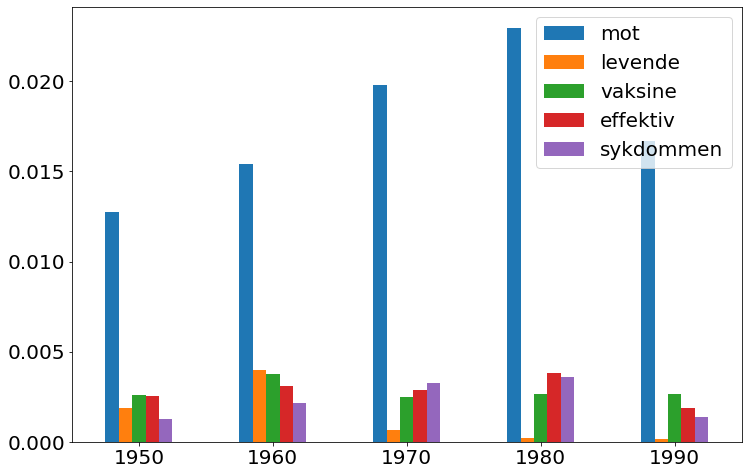

In [54]:
freq_assoc_val(agg, pmi, 1)

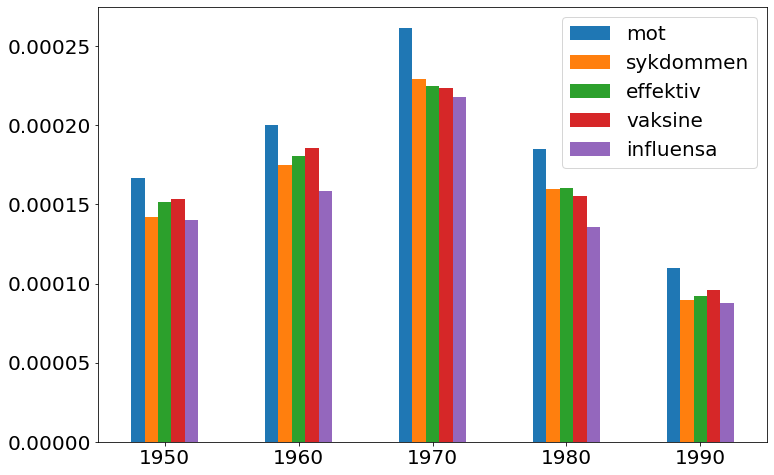

In [55]:
freq_assoc_val(pmi, pmi, 2)

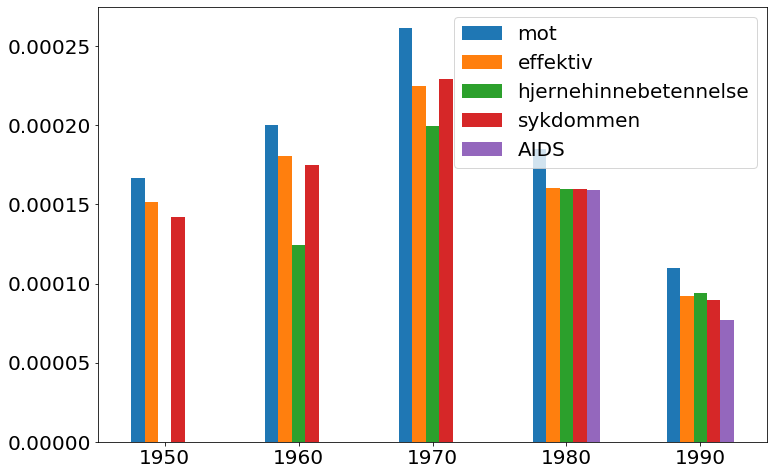

In [56]:
freq_assoc_val(pmi, pmi, 3)

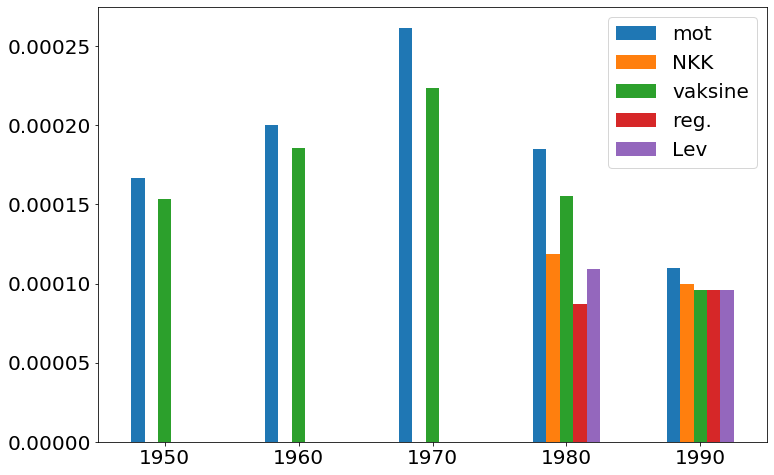

In [57]:
freq_assoc_val(pmi, pmi, 4)

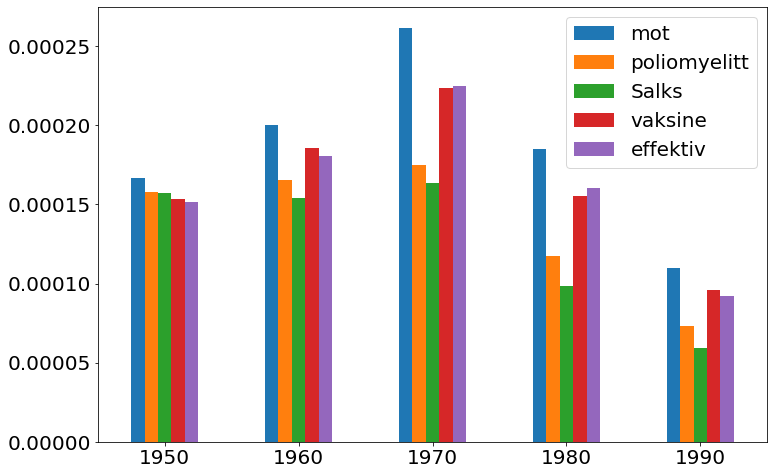

In [58]:
freq_assoc_val(pmi, pmi, 0)

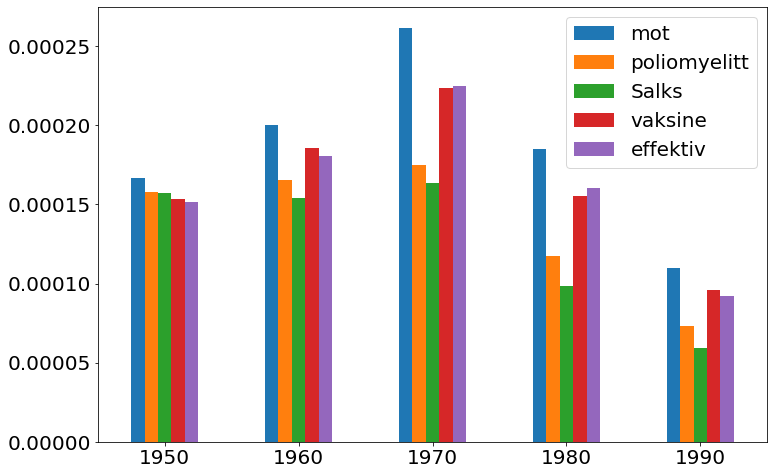

In [59]:
freq_assoc_val(pmi, pmi, 0)

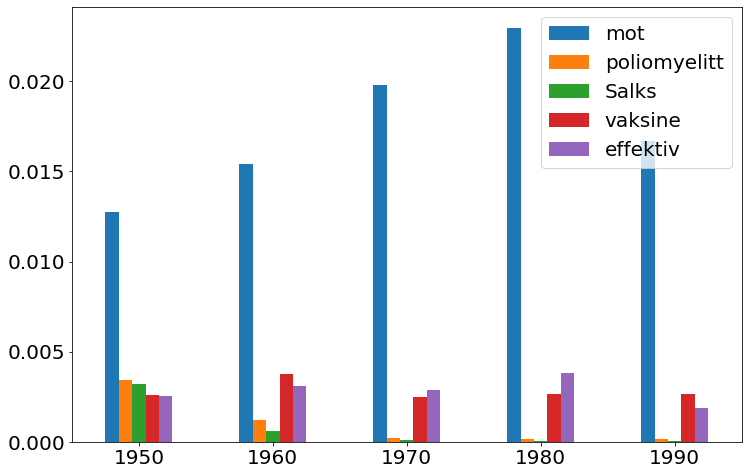

In [60]:
freq_assoc_val(agg, pmi, 0)

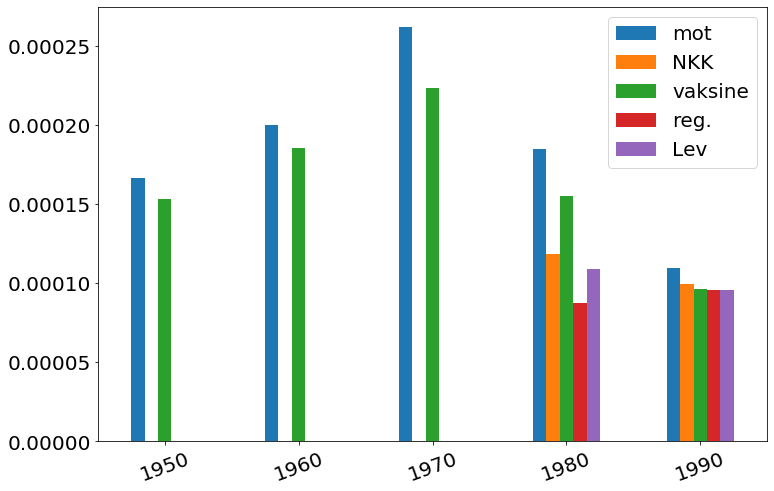

In [61]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

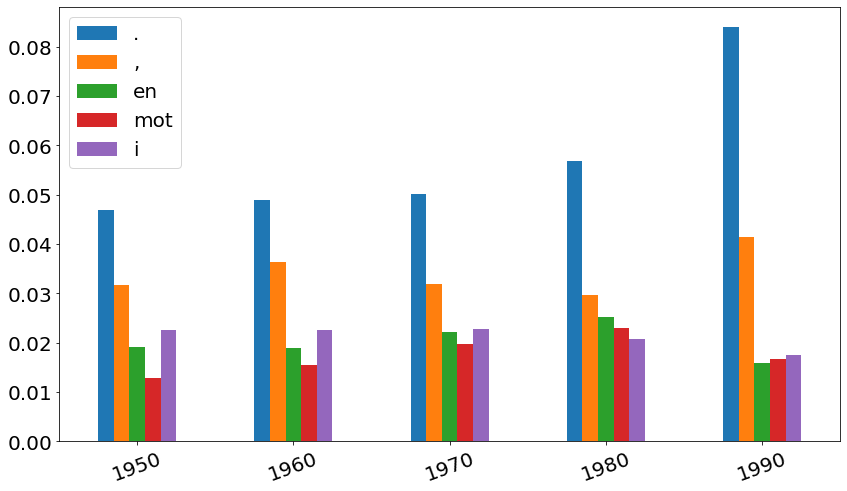

In [62]:
agg.sort_values(by=agg.columns[3], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(14, 8));

<br>
<br>
<br>
<br>

# De hundre ordene med høyest assosiasjon for perioden sortert på ordklasser

In [63]:
mdprint(pmi.sort_values(by=pmi.columns[2], ascending=False).head(100),-1)

## Benevnelser 
<span style='font-size:150%'>Lystad, Helsedirektoratet, Vaksinen, Vaksine, Institutt, Mellbye, Overlege, Helsemyndighetene, Helseorganisasjon, Instituttet</span>

## subst
<span style='font-size:1.1em'>mot, sykdommen, vaksine, influensa, virus, vaksinen, overlege, lepra, kolera, hjernehinnebetennelse, viruset, hundegalskap, forkjølelse, rabies, sykdommer, hunder, influensaen, beskyttelse, epidemi, mengder, mennesker, vaksinasjon, forskere, meslinger, immunitet, tannråte, gruppe, ikke, spedalskhet, folkehelse, motstandskraft, tuberkulose, gulsott, typen, instituttet, epidemien, forsyninger, bakterier, institutt, kusma</span>
## adj
<span style='font-size:1.1em'>effektiv, forebyggende, levende, virksom, smittsom, tilstrekkelig</span>
## verb
<span style='font-size:1.1em'>man, finnes, doser, en, lage, fremstille, medisiner, finne, produsere, vaksinere, vaksinert, type, beskytte, framstille, utvikle, å, kan, har, typer, forårsaker, beskytter, utviklet, forebygge, arbeides, opplyser, sendt, sprøyte, er, leger, lagre, lager, bekjempe, vaksiner, fremstilt, tilbudt, ny, skaffe</span>
## det
<span style='font-size:1.1em'>ingen, slik</span>
## unknown
<span style='font-size:1.1em'>helsemyndighetene, svineinfluensa</span>
## sbu
<span style='font-size:1.1em'>som</span>
## fork
<span style='font-size:1.1em'>dr.</span>
## prep
<span style='font-size:1.1em'>fram</span>


# Hvordan utvikler ordene seg?

In [64]:
barchart = lambda w, title='', df=pmi: df.loc[w].transpose().plot(kind='bar',title=title, rot=20, figsize=(12,6)) ;

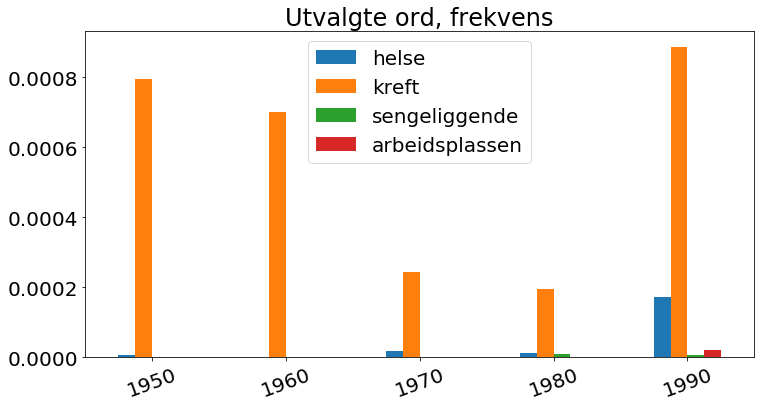

In [65]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, frekvens', df=agg);

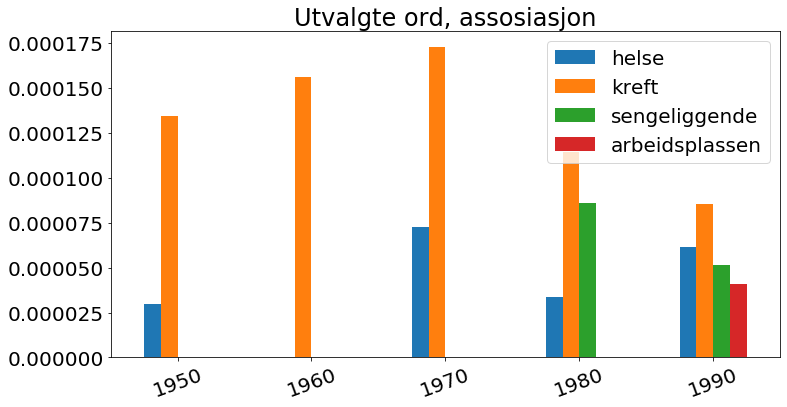

In [66]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, assosiasjon');

<br>
<br>

# Sjekk ut vanlige ord

Bare for å se at de har lave verdier og er stabile gjennom kollokasjonen

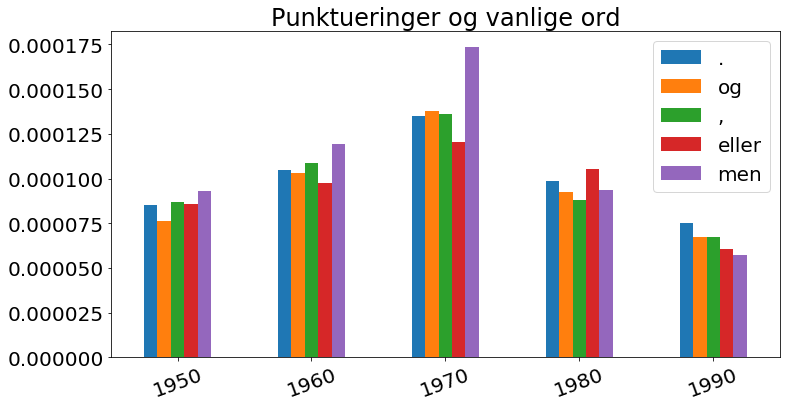

In [67]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', pmi);

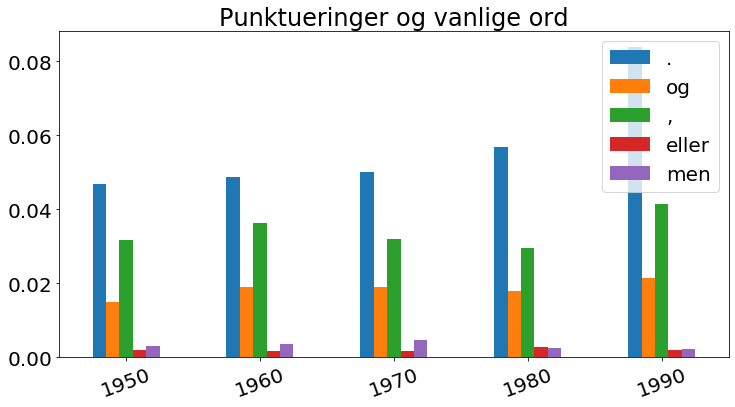

In [68]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', agg);

<br>
<br>

# De fremste blandt topoi 

Merk at på grunn av louvain-algoritmen kan topoiene endre seg litt fra kjøring til kjøring

In [69]:
commchart = lambda x, part =(1,6): barchart(comm[list(comm.keys())[x]][part[0]:part[1]], list(comm.keys())[x]);

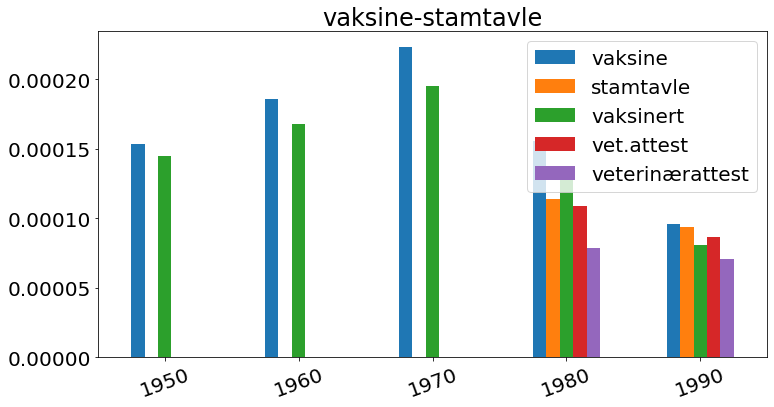

In [70]:
commchart(2, (0,5));

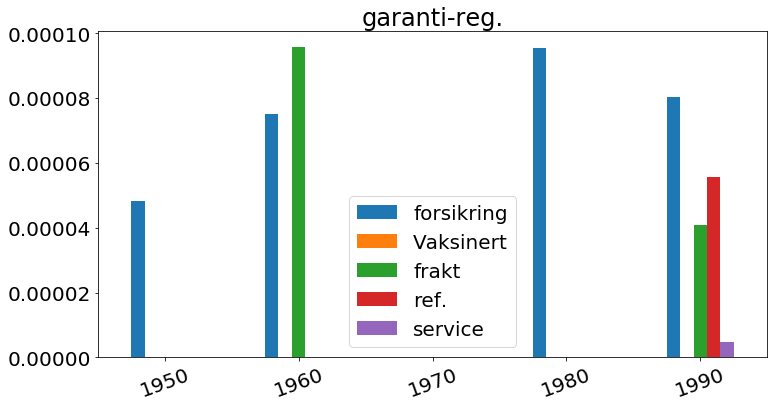

In [71]:
commchart(1, (3, 8))

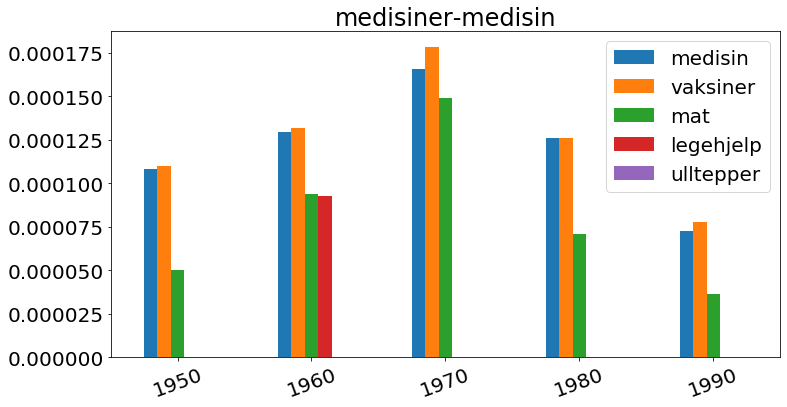

In [72]:
commchart(3)